In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# EDA

### from flashbots mev api

In [2]:
blocks_api = pd.read_csv('../../data/mev_api/blocks.csv')
transactions_api = pd.read_csv('../../data/mev_api/transactions.csv')

In [3]:
blocks_api

,block_number,miner_reward,miner,coinbase_transfers,gas_used,gas_price,is_megabundle
0,13775083,125045451439363164,0xEA674fdDe714fd979de3EdF0F56AA9716B898ec8,61786663982135467,1697891,73647514145,False
1,13775085,60167343345268217,0xEA674fdDe714fd979de3EdF0F56AA9716B898ec8,0,880215,68355280636,False
2,13775086,37221411604739120,0x3EcEf08D0e2DaD803847E052249bb4F8bFf2D5bB,0,523234,71137218920,False
3,13775087,26322208719570153,0xEA674fdDe714fd979de3EdF0F56AA9716B898ec8,0,235530,111757350314,False
4,13775088,59057993680131144,0xEA674fdDe714fd979de3EdF0F56AA9716B898ec8,0,952410,62009002089,False
...,...,...,...,...,...,...,...
9995,13794462,30595615428158201,0x1aD91ee08f21bE3dE0BA2ba6918E714dA6B45836,19802610031914612,736264,41555223979,False
9996,13794466,79215822185192457,0xEA674fdDe714fd979de3EdF0F56AA9716B898ec8,53175721058022381,980566,80785813688,False
9997,13794468,24034450843386046,0x4069e799Da927C06b430e247b2ee16C03e8B837d,11574183358211303,908374,26458761306,False
9998,13794473,6793747159712248,0x433022C4066558E7a32D850F02d2da5cA782174D,0,213966,31751526689,False


In [4]:
transactions_api

,transaction_hash,tx_index,bundle_type,bundle_index,block_number,eoa_address,to_address,gas_used,gas_price,coinbase_transfer,total_miner_reward
0,0xfcc1a4f60d9d9126c26b3e94bbb1dc7c0327496b3467...,0,rogue,0,13775083,0xEA674fdDe714fd979de3EdF0F56AA9716B898ec8,0x04d0E423323Cc245677b84703622fd35e595DC0D,21000,0,0,0
1,0x3fd3c6887905e0ff8abacf887ab7c37ad7b1e73e2261...,1,rogue,0,13775083,0xEA674fdDe714fd979de3EdF0F56AA9716B898ec8,0x8b604402E74aD01F6DE8c82D1fc479868Cd14a4E,21000,0,0,0
2,0xbdfbb5b7486c49ffe7ae421e149a0f840a5b9cacacd4...,0,flashbots,1,13775083,0x043f8524F87EFb25990b65Ff4918f9128aCF742E,0xE592427A0AEce92De3Edee1F18E0157C05861564,214615,1500000000,0,321922500000000
3,0x6fdacd70727136283e4efa827a552d86b4406dfdcf7e...,1,flashbots,1,13775083,0x8d6E15cB3442Ff24F2b8538C203B829F3D879705,0xa57Bd00134B2850B2a1c55860c9e9ea100fDd6CF,235816,262012178911,61786663982135467,61786663982135467
4,0x1264f1ad61ceefd828c46acb3482f0c1961f929b8d96...,0,flashbots,2,13775083,0xe9a9bC8A5f88ede4FE77cE2F8f557Da78791ee3e,0xE592427A0AEce92De3Edee1F18E0157C05861564,153690,1500000000,0,230535000000000
...,...,...,...,...,...,...,...,...,...,...,...
50943,0x1c6506b5b01eeee7177a66d6f5013c6689358b3dc364...,0,flashbots,1,13794473,0xBCBC1222B246E7475545c784744D3403cC9b8179,0x320c1ca2BdDA1375174a98bFd06ED7C2D60e9842,48452,1500000000,0,72678000000000
50944,0x5c98590c3489863d2eaf4e85777dee7931a7c7f40e94...,0,flashbots,0,13794474,0x614800dC2C7372F2595E66Ca62CC2FA485f00c20,0xa57Bd00134B2850B2a1c55860c9e9ea100fDd6CF,122202,493789983915,60342123614463686,60342123614463686
50945,0xdfc58de2094311b2ec895f32e0e5ad574fb04ca3a787...,0,flashbots,1,13794474,0x26cE7c1976C5eec83eA6Ac22D83cB341B08850aF,0x00000000003b3cc22aF3aE1EAc0440BcEe416B40,91514,0,0,0
50946,0x7c45c0cf0d7b411a749ff8f847e28e87749ebfd1e1f3...,1,flashbots,1,13794474,0x0a51351684e75c3e23e51d7433ED5A10b5Db42c4,0x1111111254fb6c44bAC0beD2854e76F90643097d,604405,20713262010,0,12519199125154050


### from mev-inspect

In [5]:
arbitage_swaps = pd.read_csv('../../data/mev_inspect/arbitrage_swaps.csv')
arbitages = pd.read_csv('../../data/mev_inspect/arbitrages.csv')
blocks = pd.read_csv('../../data/mev_inspect/blocks.csv')
latest_block_update = pd.read_csv('../../data/mev_inspect/latest_block_update.csv')
liquidiations = pd.read_csv('../../data/mev_inspect/liquidations.csv')
miner_payments = pd.read_csv('../../data/mev_inspect/miner_payments.csv')
prices = pd.read_csv('../../data/mev_inspect/prices.csv')
punk_pid_acceptances = pd.read_csv('../../data/mev_inspect/punk_bid_acceptances.csv')
punk_pids = pd.read_csv('../../data/mev_inspect/punk_bids.csv')
punk_snipes = pd.read_csv('../../data/mev_inspect/punk_snipes.csv')
swaps = pd.read_csv('../../data/mev_inspect/swaps.csv')
transfers = pd.read_csv('../../data/mev_inspect/transfers.csv')

In [6]:
arbitages

,id,created_at,account_address,profit_token_address,block_number,transaction_hash,start_amount,end_amount,profit_amount
0,fae8b319-4b1c-4e31-afa1-54178051df73,2021-12-12 20:50:31.191191,0x520d18f8d73f5a6a961dc42834b9291e73731030,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,12914947.0,0x1ad42324b2e62f983e639f614d6ea6d092c883fe9275...,3.105185e+18,3.121378e+18,1.619320e+16
1,1471a834-5672-459d-a34d-39c158a18a10,2021-12-12 20:50:36.550523,0x18c09bd6f4a5d72e55f332399cc2f6d1c02a7382,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,12914949.0,0x0ee3336d4afef8cff5f68d5afa135ed96f5759bf486a...,2.222100e+09,2.606449e+09,3.843492e+08
2,068613f9-ce17-4a9d-bd17-f365129ba96e,2021-12-12 20:50:36.550523,0xc8046263d5b5544f6413a98b4693488499195a46,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,12914949.0,0xf57d9fd882eefc5ccdee4487b3599145d590aed03bf1...,2.870145e+18,3.261271e+18,3.911255e+17
3,cc69ec51-d46b-4daf-97cf-c3c93d101ef1,2021-12-12 20:50:37.739826,0x5e6732d6416d3f3a6574b61ef1c81316cf8d9287,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,12914944.0,0x448245bf1a507b73516c4eeee01611927dada6610bf2...,1.200000e+18,1.950005e+18,7.500053e+17
4,467bdbbc-7bf2-4f96-bde6-320bfd0c89db,2021-12-12 20:50:37.739826,0x0000fee6275dab194ab538a01dd8b18b02b20000,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,12914944.0,0xfcf4558f6432689ea57737fe63124a5ec39fd6ba6aaf...,7.028764e+19,1.238484e+20,5.356071e+19
...,...,...,...,...,...,...,...,...,...
10903,f7527979-5cf1-4e02-adb9-59fc8eeb1719,2021-12-13 10:11:42.763487,0xdfee68a9adb981cd08699891a11cabe10f25ec44,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,13774095.0,0xf9aa6e93494f0b04829de6615b654de3cf99277e718e...,9.402253e+17,9.595889e+17,1.936358e+16
10904,703f24dd-ca40-4f5f-9889-8e4d99addb2d,2021-12-13 10:11:48.188804,0xa75af537fb853bb432f6a51d47d70e349fffc6ba,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,13774097.0,0x00e8d886e9de2c446e969dc11076ccd6d0974b89e111...,2.040914e+18,2.063709e+18,2.279418e+16
10905,9a6b1c9b-de07-4107-9627-dfeb4e5628dd,2021-12-13 10:11:48.188804,0x23c8030cb6e7e9f190f79591a39cc928c55d650f,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,13774097.0,0xe7dc8ff4fd810ca8704a2104b9d848177c1d4128b142...,8.810392e+17,9.160193e+17,3.498006e+16
10906,2f353773-8108-4e94-8bfc-598da8a1ff4c,2021-12-13 10:11:48.188804,0x4d638adb8c07a78655e9ae88641c4202774e6584,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,13774097.0,0xf348996193e2e3dc10cb38d782612f390693aea40556...,5.008520e+17,5.163296e+17,1.547764e+16


In [7]:
blocks

,block_number,block_timestamp
0,12914947.0,2021-07-28 14:29:44
1,12914949.0,2021-07-28 14:30:17
2,12914944.0,2021-07-28 14:28:24
3,12914946.0,2021-07-28 14:29:36
4,12914945.0,2021-07-28 14:29:30
...,...,...
7053,13774095.0,2021-12-10 00:04:25
7054,13774092.0,2021-12-10 00:04:17
7055,13774099.0,2021-12-10 00:06:01
7056,13774097.0,2021-12-10 00:04:55


In [8]:
swaps

,created_at,abi_name,transaction_hash,block_number,protocol,contract_address,from_address,to_address,token_in_address,token_in_amount,token_out_address,token_out_amount,trace_address,error
0,2021-12-12 20:50:40.883485,UniswapV2Pair,0x037c2af75bafc2434847adf1a3bf1f04b2840a373a23...,12914945.0,NaN,0xedc25e28c40762b64fa8fe139939c9164d5b3805,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0xfedf777904c0feadf4b5885125c892315dba4cb7,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,6.150000e+18,0x155040625d7ae3e9cada9a73e3e44f76d3ed1409,1.120789e+22,[3],NaN
1,2021-12-12 20:50:40.883485,UniswapV2Pair,0x061bfbbc4872ce77437a34221f55238c011ddca5ded0...,12914945.0,NaN,0x17a2194d55f52fd0c711e0e42b41975494bb109b,0x0000000000884a0e1fb44f9e24fa3bdb19514fae,0x648450d9c30b73e2229303026107a1f7eb639f6c,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,1.605957e+18,0x1337def16f9b486faed0293eb623dc8395dfe46a,1.880185e+22,[1],NaN
2,2021-12-12 20:50:40.883485,UniswapV2Pair,0x061bfbbc4872ce77437a34221f55238c011ddca5ded0...,12914945.0,NaN,0x648450d9c30b73e2229303026107a1f7eb639f6c,0x17a2194d55f52fd0c711e0e42b41975494bb109b,0x0000000000884a0e1fb44f9e24fa3bdb19514fae,0x1337def16f9b486faed0293eb623dc8395dfe46a,1.880185e+22,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,1.626269e+18,[2],NaN
3,2021-12-12 20:50:40.883485,UniswapV2Pair,0x0f15ba6141f3828a7e452d8c72e3f61c0ed7dffeca5c...,12914945.0,NaN,0xedc25e28c40762b64fa8fe139939c9164d5b3805,0x1d6e8bac6ea3730825bde4b005ed7b2b39a2932d,0x1d6e8bac6ea3730825bde4b005ed7b2b39a2932d,0x155040625d7ae3e9cada9a73e3e44f76d3ed1409,1.396303e+21,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,7.753635e+17,[1],NaN
4,2021-12-12 20:50:40.883485,UniswapV2Pair,0x162c3488b8d712c7ebe8f3a2d9cf772a5f55c6ca6f2d...,12914945.0,NaN,0x9cbfb60a09a9a33a10312da0f39977cbdb7fde23,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0x85c8ef1942ea7a3830e96ea61e92e016248d26f8,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,2.500000e+17,0x8b3192f5eebd8579568a2ed41e6feb402f93f73f,6.227875e+20,[3],NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178330,2021-12-13 10:11:49.726265,UniswapV2Pair,0xe5d7e4364edc475ee451434e3c5fae4f0f55a3908ffa...,13774098.0,NaN,0x48879c248f04d686c3856278cf3e334113d91c91,0x0000000000d41c96294ccdac8612bdfe29c641af,0x0000000000d41c96294ccdac8612bdfe29c641af,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,3.305972e+17,0x9f64f42e9db2802c02fe8e6144a7972f4923fcc2,3.697940e+24,[1],NaN
178331,2021-12-13 10:11:49.726265,UniswapV3Pool,0xeab92a8af9105354711e1454f16d5d7fbc912ecf8aa1...,13774098.0,NaN,0xb2f8b3bad4325c3c62f294da45fc144b1b180cc2,0xdef1c0ded9bec7f1a1670819833240f027b25eff,0xe66b31678d6c16e9ebf358268a790b763c133750,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,8.434043e+17,0xdacd69347de42babfaecd09dc88958378780fb62,5.170400e+04,"[1, 0, 1]",NaN
178332,2021-12-13 10:11:49.726265,UniswapV2Pair,0xf739d956d24418fb8f2fc8ea8261cd16fa8c70163145...,13774098.0,NaN,0xdfd1b6b65fcda1f343d138bdf422862c6745b2ea,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0xd0b19522f4128a9c90bbd79ba8c4d55378edd5f4,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,2.000000e+17,0xfde57fee4bcca80485714bd640d6e5afe8ac4d66,5.376109e+23,[3],NaN
178333,2021-12-13 10:11:49.726265,UniswapV3Pool,0xf840e5c95c33e41584fe73707404e0e2c74da9fef9bc...,13774098.0,NaN,0x88e6a0c2ddd26feeb64f039a2c41296fcb3f5640,0xb52a2753f420d7ad2a6588008d722b1679fad331,0xb52a2753f420d7ad2a6588008d722b1679fad331,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,3.500000e+10,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,8.476384e+18,[0],NaN


In [9]:
transfers

,created_at,block_number,transaction_hash,trace_address,protocol,from_address,to_address,token_address,amount,error
0,2021-12-13 04:39:08.105093,13775086.0,0x576cfb1d1d78979887f5ff7f6d66072ccc58617a07b5...,"[0, 0]",NaN,0x70885952f174fb5396deebb66ce3b4b2adfcef8a,0x9edd7d5dde2b8fc391c5a5b646008d0b65afb6b5,0xdac17f958d2ee523a2206206994597c13d831ec7,2.892596e+10,NaN
1,2021-12-13 04:39:08.105093,13775086.0,0x576cfb1d1d78979887f5ff7f6d66072ccc58617a07b5...,"[0, 2, 0]",NaN,0x9edd7d5dde2b8fc391c5a5b646008d0b65afb6b5,0x70885952f174fb5396deebb66ce3b4b2adfcef8a,0x08c32b0726c5684024ea6e141c50ade9690bbdcc,1.500000e+22,NaN
2,2021-12-13 04:39:08.105093,13775086.0,0xfdae6f685359533cb479f59551d86ff9e18b0e67f217...,"[0, 0]",NaN,0x70885952f174fb5396deebb66ce3b4b2adfcef8a,0x80d972d2a62ba71814f4e08bd27f95e5d81d02a9,0x08c32b0726c5684024ea6e141c50ade9690bbdcc,4.845180e+21,NaN
3,2021-12-13 04:39:08.105093,13775086.0,0xfdae6f685359533cb479f59551d86ff9e18b0e67f217...,"[0, 2, 0, 0]",NaN,0x11b815efb8f581194ae79006d24e0d814b7697f6,0x70885952f174fb5396deebb66ce3b4b2adfcef8a,0xdac17f958d2ee523a2206206994597c13d831ec7,9.254106e+09,NaN
4,2021-12-13 04:39:08.105093,13775086.0,0xfdae6f685359533cb479f59551d86ff9e18b0e67f217...,"[0, 2, 0, 2, 0]",NaN,0x7cf09d7a9a74f746edcb06949b9d64bcd9d1604f,0x11b815efb8f581194ae79006d24e0d814b7697f6,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,2.234105e+18,NaN
...,...,...,...,...,...,...,...,...,...,...
1826605,2021-12-13 10:11:49.601388,13774098.0,0xe6a3bbed275157debd0e039487490986fe5c2cee829e...,[0],NaN,0x1168e1562ff0733433effe7ca4e14a105bd244e5,0x55fe002aeff02f77364de339a1292923a15844b8,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,6.307681e+12,NaN
1826606,2021-12-13 10:11:49.601388,13774098.0,0xe6a3bbed275157debd0e039487490986fe5c2cee829e...,"[0, 0]",NaN,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,0x55fe002aeff02f77364de339a1292923a15844b8,0xa2327a938febf5fec13bacfb16ae10ecbc4cbdcf,6.307681e+12,NaN
1826607,2021-12-13 10:11:49.601388,13774098.0,0x3d7e7634a1fcc44b3aa89eb60f80540c29cdaf430c9a...,[],NaN,0xb50c652e4a1baf8d9e4269aa4cdd096b8174a041,0x8ea6e7620bc338c08f7fd873970e52e29df7054d,0xeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeee,2.558127e+17,NaN
1826608,2021-12-13 10:11:49.601388,13774098.0,0xea6b576eacb6e542f8c0552c47e2c4d9a7dad953a092...,[],NaN,0x4e49209d61efe99e7fefd86a1397689094d8c1bf,0x7aee50484a1bc8dd7d9a4dad05b6021085473680,0xeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeee,2.828717e+15,NaN


In [10]:
all_dfs = {
    'blocks_api' : blocks_api,
    'transactions_api': transactions_api,
    'arbitage_swaps': arbitage_swaps,
    'arbitages': arbitages,
    'blocks': blocks,
    'latest_block_update': latest_block_update,
    'liquidiations': liquidiations,
    'miner_payments': miner_payments,
    'prices': prices,
    'punk_pid_acceptances': punk_pid_acceptances,
    'punk_pids': punk_pids,
    'punk_snipes': punk_snipes,
    'swaps': swaps,
    'transfers': transfers
}

In [11]:
print('common cols: {}'.format(set.intersection(*map(set, [df.columns for df in all_dfs.values()]))))

common cols: set()


In [12]:
liquidiations.columns

Index(['created_at', 'liquidated_user', 'liquidator_user',
       'debt_token_address', 'debt_purchase_amount', 'received_amount',
       'protocol', 'transaction_hash', 'trace_address', 'block_number',
       'received_token_address'],
      dtype='object')

In [14]:
for name, df in all_dfs.items():
#     if name in ['arbitrages', 'blocks,', 'miner_payments', 'swaps', 'transfers']:
#         print(name)
#         print(df.info())
#         print()
   
    print(name)
    print(df.info())
    print()

blocks_api
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   block_number        10000 non-null  int64 
 1   miner_reward        10000 non-null  object
 2   miner               10000 non-null  object
 3   coinbase_transfers  10000 non-null  object
 4   gas_used            10000 non-null  int64 
 5   gas_price           10000 non-null  int64 
 6   is_megabundle       10000 non-null  bool  
dtypes: bool(1), int64(3), object(3)
memory usage: 478.6+ KB
None

transactions_api
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50948 entries, 0 to 50947
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   transaction_hash    50948 non-null  object
 1   tx_index            50948 non-null  int64 
 2   bundle_type         50948 non-null  object
 3   bundle_index

### which swaps have the highest miner payments and gas prices

In [15]:
miner_payments

,created_at,block_number,transaction_hash,transaction_index,miner_address,coinbase_transfer,base_fee_per_gas,gas_price,gas_price_with_coinbase_transfer,gas_used,transaction_to_address,transaction_from_address
0,2021-12-12 20:50:40.973841,12914945.0,0x918d88489206c04f1970e1de5486c95b77b48de6aae9...,0.0,0xEA674fdDe714fd979de3EdF0F56AA9716B898ec8,0.000000e+00,0.000000e+00,4.900000e+10,4.900000e+10,122036.0,0xd9e1ce17f2641f24ae83637ab66a2cca9c378b9f,0xddb6762aff00b592fb060835e839a38b4d56f4c7
1,2021-12-12 20:50:40.973841,12914945.0,0xef0ea80b9227089741b7a5adcc147a4a478abe8201cd...,1.0,0xEA674fdDe714fd979de3EdF0F56AA9716B898ec8,9.183309e+17,0.000000e+00,2.748317e+07,6.659715e+12,137894.0,0xcc1deb828b1baddd45dbb75ceab110b0d57a2666,0x00111b95923f6ef5dcc2fc44bac83f5fb091c967
2,2021-12-12 20:50:40.973841,12914945.0,0x69cf5e7149bf968f94a473dd8bcc6f5aa8246ca07569...,2.0,0xEA674fdDe714fd979de3EdF0F56AA9716B898ec8,0.000000e+00,0.000000e+00,2.748423e+07,2.748423e+07,55688.0,0x1d6e8bac6ea3730825bde4b005ed7b2b39a2932d,0x30b8235f492265a734347c0bf36e2ffcad887be2
3,2021-12-12 20:50:40.973841,12914945.0,0x037c2af75bafc2434847adf1a3bf1f04b2840a373a23...,3.0,0xEA674fdDe714fd979de3EdF0F56AA9716B898ec8,0.000000e+00,0.000000e+00,4.290000e+10,4.290000e+10,91851.0,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0xfedf777904c0feadf4b5885125c892315dba4cb7
4,2021-12-12 20:50:40.973841,12914945.0,0x0f15ba6141f3828a7e452d8c72e3f61c0ed7dffeca5c...,4.0,0xEA674fdDe714fd979de3EdF0F56AA9716B898ec8,0.000000e+00,0.000000e+00,5.095956e+11,5.095956e+11,48202.0,0x1d6e8bac6ea3730825bde4b005ed7b2b39a2932d,0x30b8235f492265a734347c0bf36e2ffcad887be2
...,...,...,...,...,...,...,...,...,...,...,...,...
1351987,2021-12-13 10:11:49.924327,13774098.0,0xe6a3bbed275157debd0e039487490986fe5c2cee829e...,689.0,0x829BD824B016326A401d083B33D092293333A830,0.000000e+00,8.614245e+10,8.839245e+10,8.839245e+10,49235.0,0x1168e1562ff0733433effe7ca4e14a105bd244e5,0x55fe002aeff02f77364de339a1292923a15844b8
1351988,2021-12-13 10:11:49.924327,13774098.0,0x1691346d080cb2a28be74aea0c47ee38a184fe7849b6...,690.0,0x829BD824B016326A401d083B33D092293333A830,0.000000e+00,8.614245e+10,8.814245e+10,8.814245e+10,46458.0,0xdacd69347de42babfaecd09dc88958378780fb62,0x156f5c4f2c08e8c6b9c9d4475a665ca1f3299204
1351989,2021-12-13 10:11:49.924327,13774098.0,0x3d7e7634a1fcc44b3aa89eb60f80540c29cdaf430c9a...,691.0,0x829BD824B016326A401d083B33D092293333A830,0.000000e+00,8.614245e+10,8.814245e+10,8.814245e+10,21000.0,0x8ea6e7620bc338c08f7fd873970e52e29df7054d,0xb50c652e4a1baf8d9e4269aa4cdd096b8174a041
1351990,2021-12-13 10:11:49.924327,13774098.0,0xea6b576eacb6e542f8c0552c47e2c4d9a7dad953a092...,692.0,0x829BD824B016326A401d083B33D092293333A830,0.000000e+00,8.614245e+10,8.814245e+10,8.814245e+10,21000.0,0x7aee50484a1bc8dd7d9a4dad05b6021085473680,0x4e49209d61efe99e7fefd86a1397689094d8c1bf


In [19]:
top_ten_miner_payments = miner_payments.sort_values(['gas_price_with_coinbase_transfer'], ascending=False).copy()[:10]
top_ten_miner_payments

,created_at,block_number,transaction_hash,transaction_index,miner_address,coinbase_transfer,base_fee_per_gas,gas_price,gas_price_with_coinbase_transfer,gas_used,transaction_to_address,transaction_from_address
1133,2021-12-12 20:50:37.802061,12914944.0,0xfcf4558f6432689ea57737fe63124a5ec39fd6ba6aaf...,1.0,0x5A0b54D5dc17e0AadC383d2db43B0a0D3E029c4c,4.820464e+19,0.000000e+00,0.000000e+00,2.004634e+14,240466.0,0x00000000454a11ca3a574738c0aab442b62d5d45,0xd80276cd0348e9b3c5d017e1f7529f0a785fec3a
696744,2021-12-13 08:14:16.809804,13778571.0,0xb37665838006f33ac2603142b702f1a8a49ef113eac6...,1.0,0x3EcEf08D0e2DaD803847E052249bb4F8bFf2D5bB,1.672697e+19,7.132432e+10,7.132432e+10,8.479060e+13,197440.0,0x911605012f87a3017322c81fcb4c90ada7c09116,0x8c62d14e6647852d05af2a2f307e81a046d653c4
21240,2021-12-13 04:41:23.598448,13775180.0,0x5e0aec780b3c410175c917196d447f11d14393cb51ff...,1.0,0xEA674fdDe714fd979de3EdF0F56AA9716B898ec8,1.792935e+19,7.167207e+10,7.167207e+10,8.477592e+13,211670.0,0xe0a9efe32985cc306255b395a1bd06d21ccead42,0x53d8a6a3368ffe7b844782d8a037012497110d81
6832,2021-12-13 04:39:48.436114,13775108.0,0xb01af827d9629b5ef6d07c6ae3f8ea21452ed9d74c8c...,2.0,0x7F101fE45e6649A6fB8F3F8B43ed03D353f2B90c,7.355265e+18,7.593497e+10,7.754695e+10,7.981979e+13,92238.0,0x00000000003b3cc22af3ae1eac0440bcee416b40,0xa6ae57b1da8238cd149bc718c40578e4620b752c
508065,2021-12-13 06:07:28.697976,13777550.0,0x42791ce56b935c55e8ecb71ffcbf89326cc8f336563f...,2.0,0x829BD824B016326A401d083B33D092293333A830,0.000000e+00,7.716947e+10,6.882866e+13,6.882866e+13,76839.0,0x00000000003b3cc22af3ae1eac0440bcee416b40,0x26ce7c1976c5eec83ea6ac22d83cb341b08850af
696256,2021-12-13 08:14:11.366829,13778567.0,0x63c14384dabe12a225d80098bef9ead080beb5157126...,1.0,0x45a36a8e118C37e4c47eF4Ab827A7C9e579E11E2,1.020223e+19,7.991238e+10,7.991238e+10,5.668914e+13,180222.0,0x0000000000007f150bd6f54c40a34d7c3d5e9f56,0xc26b35339a61f791b74d0b93706b21e2eeffbb63
1227312,2021-12-13 09:55:04.453397,13774938.0,0x9fce750dabca4f7a0b9ba1a77c8c3b0c77188acd7d54...,2.0,0x7F101fE45e6649A6fB8F3F8B43ed03D353f2B90c,5.087598e+18,5.398912e+10,5.398912e+10,5.093658e+13,99987.0,0x00000000003b3cc22af3ae1eac0440bcee416b40,0xa6ae57b1da8238cd149bc718c40578e4620b752c
603163,2021-12-13 08:02:57.950354,13778028.0,0x28249679f0b8b54159af765aa7b71df751f28977539e...,77.0,0xEA674fdDe714fd979de3EdF0F56AA9716B898ec8,8.185974e+18,9.051762e+10,9.051762e+10,3.565310e+13,230185.0,0xa57bd00134b2850b2a1c55860c9e9ea100fdd6cf,0xeca2e2d894d19778939bd4dfc34d2a3c45e96456
603164,2021-12-13 08:02:57.950354,13778028.0,0xb81fe9ac0393614e5c32b573de2abbd992180dc0975a...,78.0,0xEA674fdDe714fd979de3EdF0F56AA9716B898ec8,1.150025e+19,9.051762e+10,9.051762e+10,3.549485e+13,324826.0,0xa57bd00134b2850b2a1c55860c9e9ea100fdd6cf,0xddd6aa78c3fda8afa10572210bc0af2a20461f37
1108364,2021-12-13 09:21:50.047941,13780844.0,0x6e0a8b2e3fc49514d3f76df81efb8a18502ce119341a...,2.0,0x829BD824B016326A401d083B33D092293333A830,0.000000e+00,1.164766e+11,3.431285e+13,3.431285e+13,124654.0,0x7cf09d7a9a74f746edcb06949b9d64bcd9d1604f,0xb3b6dceeb3b6501ac72feb06f36b0446facf38b4


In [50]:
top_five_miner_payments_swaps = top_ten_miner_payments.merge(swaps, how='inner', on='transaction_hash')[:5]

In [51]:
top_five_miner_payments_swaps.columns

Index(['created_at_x', 'block_number_x', 'transaction_hash',
       'transaction_index', 'miner_address', 'coinbase_transfer',
       'base_fee_per_gas', 'gas_price', 'gas_price_with_coinbase_transfer',
       'gas_used', 'transaction_to_address', 'transaction_from_address',
       'created_at_y', 'abi_name', 'block_number_y', 'protocol',
       'contract_address', 'from_address', 'to_address', 'token_in_address',
       'token_in_amount', 'token_out_address', 'token_out_amount',
       'trace_address', 'error'],
      dtype='object')

In [57]:
top_five_miner_payments_swaps_condensed = top_five_miner_payments_swaps[['created_at_x', 'block_number_x', 'transaction_hash',
       'transaction_index', 'miner_address', 'gas_price_with_coinbase_transfer',
       'gas_used', 'transaction_to_address', 'transaction_from_address',
       'created_at_y', 'abi_name',
       'contract_address', 'from_address', 'to_address', 'token_in_address',
       'token_in_amount', 'token_out_address', 'token_out_amount',
       'trace_address', 'error']]

In [58]:
top_five_miner_payments_swaps_condensed

,created_at_x,block_number_x,transaction_hash,transaction_index,miner_address,gas_price_with_coinbase_transfer,gas_used,transaction_to_address,transaction_from_address,created_at_y,abi_name,contract_address,from_address,to_address,token_in_address,token_in_amount,token_out_address,token_out_amount,trace_address,error
0,2021-12-12 20:50:37.802061,12914944.0,0xfcf4558f6432689ea57737fe63124a5ec39fd6ba6aaf...,1.0,0x5A0b54D5dc17e0AadC383d2db43B0a0D3E029c4c,2.004634e+14,240466.0,0x00000000454a11ca3a574738c0aab442b62d5d45,0xd80276cd0348e9b3c5d017e1f7529f0a785fec3a,2021-12-12 20:50:37.729916,UniswapV3Pool,0x88e6a0c2ddd26feeb64f039a2c41296fcb3f5640,0x7ec0b75a98997c927ace6d87958147a105147ea0,0x0000fee6275dab194ab538a01dd8b18b02b20000,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2.835889e+11,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,1.238484e+20,"[0, 0]",NaN
1,2021-12-12 20:50:37.802061,12914944.0,0xfcf4558f6432689ea57737fe63124a5ec39fd6ba6aaf...,1.0,0x5A0b54D5dc17e0AadC383d2db43B0a0D3E029c4c,2.004634e+14,240466.0,0x00000000454a11ca3a574738c0aab442b62d5d45,0xd80276cd0348e9b3c5d017e1f7529f0a785fec3a,2021-12-12 20:50:37.729916,UniswapV3Pool,0x7ec0b75a98997c927ace6d87958147a105147ea0,0x99b42f2b49c395d2a77d973f6009abb5d67da343,0x88e6a0c2ddd26feeb64f039a2c41296fcb3f5640,0x25f8087ead173b73d6e8b84329989a8eea16cf73,1.973861e+23,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2.835889e+11,"[0, 0, 2, 0]",NaN
2,2021-12-12 20:50:37.802061,12914944.0,0xfcf4558f6432689ea57737fe63124a5ec39fd6ba6aaf...,1.0,0x5A0b54D5dc17e0AadC383d2db43B0a0D3E029c4c,2.004634e+14,240466.0,0x00000000454a11ca3a574738c0aab442b62d5d45,0xd80276cd0348e9b3c5d017e1f7529f0a785fec3a,2021-12-12 20:50:37.729916,UniswapV2Pair,0x99b42f2b49c395d2a77d973f6009abb5d67da343,0x0000fee6275dab194ab538a01dd8b18b02b20000,0x7ec0b75a98997c927ace6d87958147a105147ea0,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,7.028764e+19,0x25f8087ead173b73d6e8b84329989a8eea16cf73,1.973861e+23,"[0, 0, 2, 0, 2, 1]",NaN
3,2021-12-13 08:14:16.809804,13778571.0,0xb37665838006f33ac2603142b702f1a8a49ef113eac6...,1.0,0x3EcEf08D0e2DaD803847E052249bb4F8bFf2D5bB,8.479060e+13,197440.0,0x911605012f87a3017322c81fcb4c90ada7c09116,0x8c62d14e6647852d05af2a2f307e81a046d653c4,2021-12-13 08:14:16.651991,UniswapV3Pool,0x60594a405d53811d3bc4766596efd80fd545a270,0x911605012f87a3017322c81fcb4c90ada7c09116,0x34d7d7aaf50ad4944b70b320acb24c95fa2def7c,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,4.172835e+20,0x6b175474e89094c44da98b954eedeac495271d0f,1.649611e+24,[0],NaN
4,2021-12-13 08:14:16.809804,13778571.0,0xb37665838006f33ac2603142b702f1a8a49ef113eac6...,1.0,0x3EcEf08D0e2DaD803847E052249bb4F8bFf2D5bB,8.479060e+13,197440.0,0x911605012f87a3017322c81fcb4c90ada7c09116,0x8c62d14e6647852d05af2a2f307e81a046d653c4,2021-12-13 08:14:16.651991,UniswapV2Pair,0x34d7d7aaf50ad4944b70b320acb24c95fa2def7c,0x60594a405d53811d3bc4766596efd80fd545a270,0xfffae4a0f4ac251f4705717cd24cadccc9f33e06,0x6b175474e89094c44da98b954eedeac495271d0f,1.649611e+24,0x383518188c0c6d7730d91b2c03a03c837814a899,3.196099e+12,"[0, 2, 0]",NaN


In [62]:
top_five_miner_payments_swaps_condensed['token_in_address'].unique()

array(['0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48',
       '0x25f8087ead173b73d6e8b84329989a8eea16cf73',
       '0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2',
       '0x6b175474e89094c44da98b954eedeac495271d0f'], dtype=object)

In [61]:
top_five_miner_payments_swaps_condensed['token_out_address'].unique()

array(['0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2',
       '0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48',
       '0x25f8087ead173b73d6e8b84329989a8eea16cf73',
       '0x6b175474e89094c44da98b954eedeac495271d0f',
       '0x383518188c0c6d7730d91b2c03a03c837814a899'], dtype=object)

In [63]:
token_map = {
    '0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48': 'USDC',
    '0x25f8087ead173b73d6e8b84329989a8eea16cf73': 'YGG',
    '0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2': 'WETH',
    '0x6b175474e89094c44da98b954eedeac495271d0f': 'DAI',
    '0x383518188c0c6d7730d91b2c03a03c837814a899': 'OHM'
}

In [66]:
top_five_miner_payments_swaps_condensed['token_in_name'] = top_five_miner_payments_swaps_condensed['token_in_address'].map(token_map)

<ipython-input-66-74913c237c62>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_five_miner_payments_swaps_condensed['token_in_name'] = top_five_miner_payments_swaps_condensed['token_in_address'].map(token_map)


In [67]:
top_five_miner_payments_swaps_condensed['token_out_name'] = top_five_miner_payments_swaps_condensed['token_out_address'].map(token_map)

<ipython-input-67-9be121890271>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_five_miner_payments_swaps_condensed['token_out_name'] = top_five_miner_payments_swaps_condensed['token_out_address'].map(token_map)


In [69]:
top_five_miner_payments_swaps_condensed

,created_at_x,block_number_x,transaction_hash,transaction_index,miner_address,gas_price_with_coinbase_transfer,gas_used,transaction_to_address,transaction_from_address,created_at_y,...,from_address,to_address,token_in_address,token_in_amount,token_out_address,token_out_amount,trace_address,error,token_in_name,token_out_name
0,2021-12-12 20:50:37.802061,12914944.0,0xfcf4558f6432689ea57737fe63124a5ec39fd6ba6aaf...,1.0,0x5A0b54D5dc17e0AadC383d2db43B0a0D3E029c4c,2.004634e+14,240466.0,0x00000000454a11ca3a574738c0aab442b62d5d45,0xd80276cd0348e9b3c5d017e1f7529f0a785fec3a,2021-12-12 20:50:37.729916,...,0x7ec0b75a98997c927ace6d87958147a105147ea0,0x0000fee6275dab194ab538a01dd8b18b02b20000,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2.835889e+11,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,1.238484e+20,"[0, 0]",NaN,USDC,WETH
1,2021-12-12 20:50:37.802061,12914944.0,0xfcf4558f6432689ea57737fe63124a5ec39fd6ba6aaf...,1.0,0x5A0b54D5dc17e0AadC383d2db43B0a0D3E029c4c,2.004634e+14,240466.0,0x00000000454a11ca3a574738c0aab442b62d5d45,0xd80276cd0348e9b3c5d017e1f7529f0a785fec3a,2021-12-12 20:50:37.729916,...,0x99b42f2b49c395d2a77d973f6009abb5d67da343,0x88e6a0c2ddd26feeb64f039a2c41296fcb3f5640,0x25f8087ead173b73d6e8b84329989a8eea16cf73,1.973861e+23,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2.835889e+11,"[0, 0, 2, 0]",NaN,YGG,USDC
2,2021-12-12 20:50:37.802061,12914944.0,0xfcf4558f6432689ea57737fe63124a5ec39fd6ba6aaf...,1.0,0x5A0b54D5dc17e0AadC383d2db43B0a0D3E029c4c,2.004634e+14,240466.0,0x00000000454a11ca3a574738c0aab442b62d5d45,0xd80276cd0348e9b3c5d017e1f7529f0a785fec3a,2021-12-12 20:50:37.729916,...,0x0000fee6275dab194ab538a01dd8b18b02b20000,0x7ec0b75a98997c927ace6d87958147a105147ea0,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,7.028764e+19,0x25f8087ead173b73d6e8b84329989a8eea16cf73,1.973861e+23,"[0, 0, 2, 0, 2, 1]",NaN,WETH,YGG
3,2021-12-13 08:14:16.809804,13778571.0,0xb37665838006f33ac2603142b702f1a8a49ef113eac6...,1.0,0x3EcEf08D0e2DaD803847E052249bb4F8bFf2D5bB,8.479060e+13,197440.0,0x911605012f87a3017322c81fcb4c90ada7c09116,0x8c62d14e6647852d05af2a2f307e81a046d653c4,2021-12-13 08:14:16.651991,...,0x911605012f87a3017322c81fcb4c90ada7c09116,0x34d7d7aaf50ad4944b70b320acb24c95fa2def7c,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,4.172835e+20,0x6b175474e89094c44da98b954eedeac495271d0f,1.649611e+24,[0],NaN,WETH,DAI
4,2021-12-13 08:14:16.809804,13778571.0,0xb37665838006f33ac2603142b702f1a8a49ef113eac6...,1.0,0x3EcEf08D0e2DaD803847E052249bb4F8bFf2D5bB,8.479060e+13,197440.0,0x911605012f87a3017322c81fcb4c90ada7c09116,0x8c62d14e6647852d05af2a2f307e81a046d653c4,2021-12-13 08:14:16.651991,...,0x60594a405d53811d3bc4766596efd80fd545a270,0xfffae4a0f4ac251f4705717cd24cadccc9f33e06,0x6b175474e89094c44da98b954eedeac495271d0f,1.649611e+24,0x383518188c0c6d7730d91b2c03a03c837814a899,3.196099e+12,"[0, 2, 0]",NaN,DAI,OHM


In [70]:
top_five_miner_payments_swaps_condensed['token_pair'] = top_five_miner_payments_swaps_condensed['token_in_name'] + '-' + top_five_miner_payments_swaps_condensed['token_out_name']

<ipython-input-70-df1aa4c691ac>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_five_miner_payments_swaps_condensed['token_pair'] = top_five_miner_payments_swaps_condensed['token_in_name'] + '-' + top_five_miner_payments_swaps_condensed['token_out_name']


In [71]:
top_five_miner_payments_swaps_condensed

,created_at_x,block_number_x,transaction_hash,transaction_index,miner_address,gas_price_with_coinbase_transfer,gas_used,transaction_to_address,transaction_from_address,created_at_y,...,to_address,token_in_address,token_in_amount,token_out_address,token_out_amount,trace_address,error,token_in_name,token_out_name,token_pair
0,2021-12-12 20:50:37.802061,12914944.0,0xfcf4558f6432689ea57737fe63124a5ec39fd6ba6aaf...,1.0,0x5A0b54D5dc17e0AadC383d2db43B0a0D3E029c4c,2.004634e+14,240466.0,0x00000000454a11ca3a574738c0aab442b62d5d45,0xd80276cd0348e9b3c5d017e1f7529f0a785fec3a,2021-12-12 20:50:37.729916,...,0x0000fee6275dab194ab538a01dd8b18b02b20000,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2.835889e+11,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,1.238484e+20,"[0, 0]",NaN,USDC,WETH,USDC-WETH
1,2021-12-12 20:50:37.802061,12914944.0,0xfcf4558f6432689ea57737fe63124a5ec39fd6ba6aaf...,1.0,0x5A0b54D5dc17e0AadC383d2db43B0a0D3E029c4c,2.004634e+14,240466.0,0x00000000454a11ca3a574738c0aab442b62d5d45,0xd80276cd0348e9b3c5d017e1f7529f0a785fec3a,2021-12-12 20:50:37.729916,...,0x88e6a0c2ddd26feeb64f039a2c41296fcb3f5640,0x25f8087ead173b73d6e8b84329989a8eea16cf73,1.973861e+23,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2.835889e+11,"[0, 0, 2, 0]",NaN,YGG,USDC,YGG-USDC
2,2021-12-12 20:50:37.802061,12914944.0,0xfcf4558f6432689ea57737fe63124a5ec39fd6ba6aaf...,1.0,0x5A0b54D5dc17e0AadC383d2db43B0a0D3E029c4c,2.004634e+14,240466.0,0x00000000454a11ca3a574738c0aab442b62d5d45,0xd80276cd0348e9b3c5d017e1f7529f0a785fec3a,2021-12-12 20:50:37.729916,...,0x7ec0b75a98997c927ace6d87958147a105147ea0,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,7.028764e+19,0x25f8087ead173b73d6e8b84329989a8eea16cf73,1.973861e+23,"[0, 0, 2, 0, 2, 1]",NaN,WETH,YGG,WETH-YGG
3,2021-12-13 08:14:16.809804,13778571.0,0xb37665838006f33ac2603142b702f1a8a49ef113eac6...,1.0,0x3EcEf08D0e2DaD803847E052249bb4F8bFf2D5bB,8.479060e+13,197440.0,0x911605012f87a3017322c81fcb4c90ada7c09116,0x8c62d14e6647852d05af2a2f307e81a046d653c4,2021-12-13 08:14:16.651991,...,0x34d7d7aaf50ad4944b70b320acb24c95fa2def7c,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,4.172835e+20,0x6b175474e89094c44da98b954eedeac495271d0f,1.649611e+24,[0],NaN,WETH,DAI,WETH-DAI
4,2021-12-13 08:14:16.809804,13778571.0,0xb37665838006f33ac2603142b702f1a8a49ef113eac6...,1.0,0x3EcEf08D0e2DaD803847E052249bb4F8bFf2D5bB,8.479060e+13,197440.0,0x911605012f87a3017322c81fcb4c90ada7c09116,0x8c62d14e6647852d05af2a2f307e81a046d653c4,2021-12-13 08:14:16.651991,...,0xfffae4a0f4ac251f4705717cd24cadccc9f33e06,0x6b175474e89094c44da98b954eedeac495271d0f,1.649611e+24,0x383518188c0c6d7730d91b2c03a03c837814a899,3.196099e+12,"[0, 2, 0]",NaN,DAI,OHM,DAI-OHM


Text(0, 0.5, 'Gas Price (GWEI)')

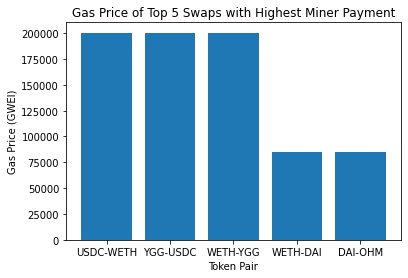

In [82]:
plt.title('Gas Price of Top 5 Swaps with Highest Miner Payment')
plt.bar(top_five_miner_payments_swaps_condensed['token_pair'], top_five_miner_payments_swaps_condensed['gas_price_with_coinbase_transfer'] / 10**9)
plt.xlabel('Token Pair')
plt.ylabel('Gas Price (GWEI)')

In [83]:
top_five_miner_payments_swaps_condensed['%_token_in'] = top_five_miner_payments_swaps_condensed['token_in_amount'] / (top_five_miner_payments_swaps_condensed['token_in_amount'] + top_five_miner_payments_swaps_condensed['token_out_amount'])
top_five_miner_payments_swaps_condensed['%_token_out'] = top_five_miner_payments_swaps_condensed['token_out_amount'] / (top_five_miner_payments_swaps_condensed['token_in_amount'] + top_five_miner_payments_swaps_condensed['token_out_amount'])

<ipython-input-83-29c371a76b15>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_five_miner_payments_swaps_condensed['%_token_in'] = top_five_miner_payments_swaps_condensed['token_in_amount'] / (top_five_miner_payments_swaps_condensed['token_in_amount'] + top_five_miner_payments_swaps_condensed['token_out_amount'])


In [84]:
top_five_miner_payments_swaps_condensed

,created_at_x,block_number_x,transaction_hash,transaction_index,miner_address,gas_price_with_coinbase_transfer,gas_used,transaction_to_address,transaction_from_address,created_at_y,...,token_in_amount,token_out_address,token_out_amount,trace_address,error,token_in_name,token_out_name,token_pair,%_token_in,%_token_out
0,2021-12-12 20:50:37.802061,12914944.0,0xfcf4558f6432689ea57737fe63124a5ec39fd6ba6aaf...,1.0,0x5A0b54D5dc17e0AadC383d2db43B0a0D3E029c4c,2.004634e+14,240466.0,0x00000000454a11ca3a574738c0aab442b62d5d45,0xd80276cd0348e9b3c5d017e1f7529f0a785fec3a,2021-12-12 20:50:37.729916,...,2.835889e+11,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,1.238484e+20,"[0, 0]",NaN,USDC,WETH,USDC-WETH,2.289808e-09,1.000000e+00
1,2021-12-12 20:50:37.802061,12914944.0,0xfcf4558f6432689ea57737fe63124a5ec39fd6ba6aaf...,1.0,0x5A0b54D5dc17e0AadC383d2db43B0a0D3E029c4c,2.004634e+14,240466.0,0x00000000454a11ca3a574738c0aab442b62d5d45,0xd80276cd0348e9b3c5d017e1f7529f0a785fec3a,2021-12-12 20:50:37.729916,...,1.973861e+23,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2.835889e+11,"[0, 0, 2, 0]",NaN,YGG,USDC,YGG-USDC,1.000000e+00,1.436722e-12
2,2021-12-12 20:50:37.802061,12914944.0,0xfcf4558f6432689ea57737fe63124a5ec39fd6ba6aaf...,1.0,0x5A0b54D5dc17e0AadC383d2db43B0a0D3E029c4c,2.004634e+14,240466.0,0x00000000454a11ca3a574738c0aab442b62d5d45,0xd80276cd0348e9b3c5d017e1f7529f0a785fec3a,2021-12-12 20:50:37.729916,...,7.028764e+19,0x25f8087ead173b73d6e8b84329989a8eea16cf73,1.973861e+23,"[0, 0, 2, 0, 2, 1]",NaN,WETH,YGG,WETH-YGG,3.559654e-04,9.996440e-01
3,2021-12-13 08:14:16.809804,13778571.0,0xb37665838006f33ac2603142b702f1a8a49ef113eac6...,1.0,0x3EcEf08D0e2DaD803847E052249bb4F8bFf2D5bB,8.479060e+13,197440.0,0x911605012f87a3017322c81fcb4c90ada7c09116,0x8c62d14e6647852d05af2a2f307e81a046d653c4,2021-12-13 08:14:16.651991,...,4.172835e+20,0x6b175474e89094c44da98b954eedeac495271d0f,1.649611e+24,[0],NaN,WETH,DAI,WETH-DAI,2.528948e-04,9.997471e-01
4,2021-12-13 08:14:16.809804,13778571.0,0xb37665838006f33ac2603142b702f1a8a49ef113eac6...,1.0,0x3EcEf08D0e2DaD803847E052249bb4F8bFf2D5bB,8.479060e+13,197440.0,0x911605012f87a3017322c81fcb4c90ada7c09116,0x8c62d14e6647852d05af2a2f307e81a046d653c4,2021-12-13 08:14:16.651991,...,1.649611e+24,0x383518188c0c6d7730d91b2c03a03c837814a899,3.196099e+12,"[0, 2, 0]",NaN,DAI,OHM,DAI-OHM,1.000000e+00,1.937487e-12


In [88]:
top_five_miner_payments_swaps_condensed[['token_pair', 'token_in_amount', 'token_out_amount']]

,token_pair,token_in_amount,token_out_amount
0,USDC-WETH,2.835889e+11,1.238484e+20
1,YGG-USDC,1.973861e+23,2.835889e+11
2,WETH-YGG,7.028764e+19,1.973861e+23
3,WETH-DAI,4.172835e+20,1.649611e+24
4,DAI-OHM,1.649611e+24,3.196099e+12


### what percent of arbitrage was paid to miners

In [74]:
top_five_miner_payments_swaps_condensed['gas_price_with_coinbase_transfer'] / 10**9

0    200463.421639
1    200463.421639
2    200463.421639
3     84790.595609
4     84790.595609
Name: gas_price_with_coinbase_transfer, dtype: float64

In [95]:
merged_arbitrages_miner_payments = arbitages.merge(miner_payments, on='transaction_hash')

In [96]:
merged_arbitrages_miner_payments

,id,created_at_x,account_address,profit_token_address,block_number_x,transaction_hash,start_amount,end_amount,profit_amount,created_at_y,block_number_y,transaction_index,miner_address,coinbase_transfer,base_fee_per_gas,gas_price,gas_price_with_coinbase_transfer,gas_used,transaction_to_address,transaction_from_address
0,fae8b319-4b1c-4e31-afa1-54178051df73,2021-12-12 20:50:31.191191,0x520d18f8d73f5a6a961dc42834b9291e73731030,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,12914947.0,0x1ad42324b2e62f983e639f614d6ea6d092c883fe9275...,3.105185e+18,3.121378e+18,1.619320e+16,2021-12-12 20:50:31.258216,12914947.0,195.0,0xEA674fdDe714fd979de3EdF0F56AA9716B898ec8,0.000000e+00,0.000000e+00,4.100000e+10,4.100000e+10,197003.0,0x520d18f8d73f5a6a961dc42834b9291e73731030,0xd104fdbfb13bab966b709339a88568440f08cadb
1,1471a834-5672-459d-a34d-39c158a18a10,2021-12-12 20:50:36.550523,0x18c09bd6f4a5d72e55f332399cc2f6d1c02a7382,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,12914949.0,0x0ee3336d4afef8cff5f68d5afa135ed96f5759bf486a...,2.222100e+09,2.606449e+09,3.843492e+08,2021-12-12 20:50:36.649088,12914949.0,3.0,0x5A0b54D5dc17e0AadC383d2db43B0a0D3E029c4c,1.426358e+17,0.000000e+00,0.000000e+00,7.463818e+11,191103.0,0x18c09bd6f4a5d72e55f332399cc2f6d1c02a7382,0xe817283f3bb275b4350287b9c1449993abb7f06d
2,068613f9-ce17-4a9d-bd17-f365129ba96e,2021-12-12 20:50:36.550523,0xc8046263d5b5544f6413a98b4693488499195a46,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,12914949.0,0xf57d9fd882eefc5ccdee4487b3599145d590aed03bf1...,2.870145e+18,3.261271e+18,3.911255e+17,2021-12-12 20:50:36.649088,12914949.0,61.0,0x5A0b54D5dc17e0AadC383d2db43B0a0D3E029c4c,0.000000e+00,0.000000e+00,6.000000e+10,6.000000e+10,248812.0,0xc8046263d5b5544f6413a98b4693488499195a46,0x814c0c2824a575ed69d476ea00074bb50ab780ca
3,cc69ec51-d46b-4daf-97cf-c3c93d101ef1,2021-12-12 20:50:37.739826,0x5e6732d6416d3f3a6574b61ef1c81316cf8d9287,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,12914944.0,0x448245bf1a507b73516c4eeee01611927dada6610bf2...,1.200000e+18,1.950005e+18,7.500053e+17,2021-12-12 20:50:37.802061,12914944.0,6.0,0x5A0b54D5dc17e0AadC383d2db43B0a0D3E029c4c,7.125050e+17,0.000000e+00,0.000000e+00,2.243870e+12,317534.0,0x5e6732d6416d3f3a6574b61ef1c81316cf8d9287,0xf6da21e95d74767009accb145b96897ac3630bad
4,467bdbbc-7bf2-4f96-bde6-320bfd0c89db,2021-12-12 20:50:37.739826,0x0000fee6275dab194ab538a01dd8b18b02b20000,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,12914944.0,0xfcf4558f6432689ea57737fe63124a5ec39fd6ba6aaf...,7.028764e+19,1.238484e+20,5.356071e+19,2021-12-12 20:50:37.802061,12914944.0,1.0,0x5A0b54D5dc17e0AadC383d2db43B0a0D3E029c4c,4.820464e+19,0.000000e+00,0.000000e+00,2.004634e+14,240466.0,0x00000000454a11ca3a574738c0aab442b62d5d45,0xd80276cd0348e9b3c5d017e1f7529f0a785fec3a
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10903,f7527979-5cf1-4e02-adb9-59fc8eeb1719,2021-12-13 10:11:42.763487,0xdfee68a9adb981cd08699891a11cabe10f25ec44,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,13774095.0,0xf9aa6e93494f0b04829de6615b654de3cf99277e718e...,9.402253e+17,9.595889e+17,1.936358e+16,2021-12-13 10:11:42.890082,13774095.0,0.0,0x52bc44d5378309EE2abF1539BF71dE1b7d7bE3b5,0.000000e+00,7.728729e+10,7.728729e+10,7.728729e+10,197474.0,0x70526cc7a6d6320b44122ea9d2d07670accc85a1,0xe088776deabb472ffd2843e330e79c880a5f979e
10904,703f24dd-ca40-4f5f-9889-8e4d99addb2d,2021-12-13 10:11:48.188804,0xa75af537fb853bb432f6a51d47d70e349fffc6ba,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,13774097.0,0x00e8d886e9de2c446e969dc11076ccd6d0974b89e111...,2.040914e+18,2.063709e+18,2.279418e+16,2021-12-13 10:11:48.303118,13774097.0,8.0,0x03e75d7DD38CCE2e20FfEE35EC914C57780A8e29,0.000000e+00,7.758022e+10,8.324930e+10,8.324930e+10,264233.0,0xa75af537fb853bb432f6a51d47d70e349fffc6ba,0xfbb018ae51850fa8fc31d1370052febd73096df4
10905,9a6b1c9b-de07-4107-9627-dfeb4e5628dd,2021-12-13 10:11:48.188804,0x23c8030cb6e7e9f190f79591a39cc928c55d650f,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,13774097.0,0xe7dc8ff4fd810ca8704a2104b9d84

In [97]:
merged_arbitrages_miner_payments.columns

Index(['id', 'created_at_x', 'account_address', 'profit_token_address',
       'block_number_x', 'transaction_hash', 'start_amount', 'end_amount',
       'profit_amount', 'created_at_y', 'block_number_y', 'transaction_index',
       'miner_address', 'coinbase_transfer', 'base_fee_per_gas', 'gas_price',
       'gas_price_with_coinbase_transfer', 'gas_used',
       'transaction_to_address', 'transaction_from_address'],
      dtype='object')

In [99]:
merged_arbitrages_miner_payments['profit_amount'] - merged_arbitrages_miner_payments['coinbase_transfer']

0        1.619320e+16
1       -1.426358e+17
2        3.911255e+17
3        3.750026e+16
4        5.356071e+18
             ...     
10903    1.936358e+16
10904    2.279418e+16
10905    3.498006e+16
10906    1.406222e+16
10907   -2.162761e+18
Length: 10908, dtype: float64

In [103]:
(merged_arbitrages_miner_payments['coinbase_transfer'] / merged_arbitrages_miner_payments['profit_amount'])

0        0.000000e+00
1        3.711100e+08
2        0.000000e+00
3        9.500000e-01
4        9.000000e-01
             ...     
10903    0.000000e+00
10904    0.000000e+00
10905    0.000000e+00
10906    9.144898e-02
10907   -0.000000e+00
Length: 10908, dtype: float64

In [105]:
merged_arbitrages_miner_payments['miner_payment_eth'] = merged_arbitrages_miner_payments['coinbase_transfer'] / 10**18

In [106]:
merged_arbitrages_miner_payments['profit_amount'] / 10**18

0        1.619320e-02
1        3.843492e-10
2        3.911255e-01
3        7.500053e-01
4        5.356071e+01
             ...     
10903    1.936358e-02
10904    2.279418e-02
10905    3.498006e-02
10906    1.547764e-02
10907   -2.162761e+00
Name: profit_amount, Length: 10908, dtype: float64

In [108]:
merged_arbitrages_miner_payments['profit_token_address'].unique()

array(['0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2',
       '0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48',
       '0x62b9c7356a2dc64a1969e19c23e4f579f9810aa7',
       '0x6b175474e89094c44da98b954eedeac495271d0f',
       '0x514910771af9ca656af840dff83e8264ecf986ca',
       '0x2260fac5e5542a773aa44fbcfedf7c193bc2c599',
       '0xdac17f958d2ee523a2206206994597c13d831ec7',
       '0xeb4c2781e4eba804ce9a9803c67d0893436bb27d',
       '0xd533a949740bb3306d119cc777fa900ba034cd52',
       '0xcafe001067cdef266afb7eb5a286dcfd277f3de5',
       '0xdbdb4d16eda451d0503b854cf79d55697f90c8df',
       '0x7d1afa7b718fb893db30a3abc0cfc608aacfebb0',
       '0x50de6856358cc35f3a9a57eaaa34bd4cb707d2cd'], dtype=object)

In [109]:
merged_arbitrages_miner_payments_eth = merged_arbitrages_miner_payments[merged_arbitrages_miner_payments['profit_token_address'] == '0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2']

In [110]:
merged_arbitrages_miner_payments_eth

,id,created_at_x,account_address,profit_token_address,block_number_x,transaction_hash,start_amount,end_amount,profit_amount,created_at_y,...,transaction_index,miner_address,coinbase_transfer,base_fee_per_gas,gas_price,gas_price_with_coinbase_transfer,gas_used,transaction_to_address,transaction_from_address,miner_payment_eth
0,fae8b319-4b1c-4e31-afa1-54178051df73,2021-12-12 20:50:31.191191,0x520d18f8d73f5a6a961dc42834b9291e73731030,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,12914947.0,0x1ad42324b2e62f983e639f614d6ea6d092c883fe9275...,3.105185e+18,3.121378e+18,1.619320e+16,2021-12-12 20:50:31.258216,...,195.0,0xEA674fdDe714fd979de3EdF0F56AA9716B898ec8,0.000000e+00,0.000000e+00,4.100000e+10,4.100000e+10,197003.0,0x520d18f8d73f5a6a961dc42834b9291e73731030,0xd104fdbfb13bab966b709339a88568440f08cadb,0.000000
2,068613f9-ce17-4a9d-bd17-f365129ba96e,2021-12-12 20:50:36.550523,0xc8046263d5b5544f6413a98b4693488499195a46,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,12914949.0,0xf57d9fd882eefc5ccdee4487b3599145d590aed03bf1...,2.870145e+18,3.261271e+18,3.911255e+17,2021-12-12 20:50:36.649088,...,61.0,0x5A0b54D5dc17e0AadC383d2db43B0a0D3E029c4c,0.000000e+00,0.000000e+00,6.000000e+10,6.000000e+10,248812.0,0xc8046263d5b5544f6413a98b4693488499195a46,0x814c0c2824a575ed69d476ea00074bb50ab780ca,0.000000
3,cc69ec51-d46b-4daf-97cf-c3c93d101ef1,2021-12-12 20:50:37.739826,0x5e6732d6416d3f3a6574b61ef1c81316cf8d9287,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,12914944.0,0x448245bf1a507b73516c4eeee01611927dada6610bf2...,1.200000e+18,1.950005e+18,7.500053e+17,2021-12-12 20:50:37.802061,...,6.0,0x5A0b54D5dc17e0AadC383d2db43B0a0D3E029c4c,7.125050e+17,0.000000e+00,0.000000e+00,2.243870e+12,317534.0,0x5e6732d6416d3f3a6574b61ef1c81316cf8d9287,0xf6da21e95d74767009accb145b96897ac3630bad,0.712505
4,467bdbbc-7bf2-4f96-bde6-320bfd0c89db,2021-12-12 20:50:37.739826,0x0000fee6275dab194ab538a01dd8b18b02b20000,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,12914944.0,0xfcf4558f6432689ea57737fe63124a5ec39fd6ba6aaf...,7.028764e+19,1.238484e+20,5.356071e+19,2021-12-12 20:50:37.802061,...,1.0,0x5A0b54D5dc17e0AadC383d2db43B0a0D3E029c4c,4.820464e+19,0.000000e+00,0.000000e+00,2.004634e+14,240466.0,0x00000000454a11ca3a574738c0aab442b62d5d45,0xd80276cd0348e9b3c5d017e1f7529f0a785fec3a,48.204637
5,4624ec43-043c-4c01-ae69-da36fbf1ceb1,2021-12-12 20:50:39.485589,0xf51fe29a7dbd6e355f735b4fd91140416c3b677d,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,12914946.0,0x7af20121860478c2e9d824a9aa4c25e352191d823d99...,1.000000e+18,1.050662e+18,5.066171e+16,2021-12-12 20:50:39.557241,...,43.0,0xEA674fdDe714fd979de3EdF0F56AA9716B898ec8,0.000000e+00,0.000000e+00,1.098900e+11,1.098900e+11,224824.0,0xf51fe29a7dbd6e355f735b4fd91140416c3b677d,0x95965c7e1699dcce28fd8f4fe6713673f9b58fa0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10903,f7527979-5cf1-4e02-adb9-59fc8eeb1719,2021-12-13 10:11:42.763487,0xdfee68a9adb981cd08699891a11cabe10f25ec44,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,13774095.0,0xf9aa6e93494f0b04829de6615b654de3cf99277e718e...,9.402253e+17,9.595889e+17,1.936358e+16,2021-12-13 10:11:42.890082,...,0.0,0x52bc44d5378309EE2abF1539BF71dE1b7d7bE3b5,0.000000e+00,7.728729e+10,7.728729e+10,7.728729e+10,197474.0,0x70526cc7a6d6320b44122ea9d2d07670accc85a1,0xe088776deabb472ffd2843e330e79c880a5f979e,0.000000
10904,703f24dd-ca40-4f5f-9889-8e4d99addb2d,2021-12-13 10:11:48.188804,0xa75af537fb853bb432f6a51d47d70e349fffc6ba,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,13774097.0,0x00e8d886e9de2c446e969dc11076ccd6d0974b89e111...,2.040914e+18,2.063709e+18,2.279418e+16,2021-12-13 10:11:48.303118,...,8.0,0x03e75d7DD38CCE2e20FfEE35EC914C57780A8e29,0.000000e+00,7.758022e+10,8.324930e+10,8.324930e+10,264233.0,0xa75af537fb853bb432f6a51d47d70e349fffc6ba,0xfbb018ae51850fa8fc31d1370052febd73096df4,0.000000
10905,9a6b1c9b-de07-4107-9627-dfeb4e5628dd,2021-12-13 10:11:48.188804,0x23c8030cb6e7e9f190f79591a39cc928c55d650f,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,13774097.0,0xe7

In [113]:
merged_arbitrages_miner_payments_eth['profit-miner_payment'] = merged_arbitrages_miner_payments_eth['profit_amount'] - merged_arbitrages_miner_payments_eth['coinbase_transfer']

<ipython-input-113-c67f1716857a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_arbitrages_miner_payments_eth['profit-miner_payment'] = merged_arbitrages_miner_payments_eth['profit_amount'] - merged_arbitrages_miner_payments_eth['coinbase_transfer']


In [114]:
merged_arbitrages_miner_payments_eth['miner_payment/profit'] = merged_arbitrages_miner_payments_eth['coinbase_transfer'] / merged_arbitrages_miner_payments_eth['profit_amount']

<ipython-input-114-e3e8c86d0b5e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_arbitrages_miner_payments_eth['miner_payment/profit'] = merged_arbitrages_miner_payments_eth['coinbase_transfer'] / merged_arbitrages_miner_payments_eth['profit_amount']


In [116]:
merged_arbitrages_miner_payments_eth.columns

Index(['id', 'created_at_x', 'account_address', 'profit_token_address',
       'block_number_x', 'transaction_hash', 'start_amount', 'end_amount',
       'profit_amount', 'created_at_y', 'block_number_y', 'transaction_index',
       'miner_address', 'coinbase_transfer', 'base_fee_per_gas', 'gas_price',
       'gas_price_with_coinbase_transfer', 'gas_used',
       'transaction_to_address', 'transaction_from_address',
       'miner_payment_eth', 'profit-miner_payment', 'miner_payment/profit'],
      dtype='object')

In [120]:
merged_arbitrages_miner_payments_eth_condensed = merged_arbitrages_miner_payments_eth[['profit_amount', 'coinbase_transfer', 'profit-miner_payment', 'miner_payment/profit']]

In [121]:
merged_arbitrages_miner_payments_eth_condensed

,profit_amount,coinbase_transfer,profit-miner_payment,miner_payment/profit
0,1.619320e+16,0.000000e+00,1.619320e+16,0.000000
2,3.911255e+17,0.000000e+00,3.911255e+17,0.000000
3,7.500053e+17,7.125050e+17,3.750026e+16,0.950000
4,5.356071e+19,4.820464e+19,5.356071e+18,0.900000
5,5.066171e+16,0.000000e+00,5.066171e+16,0.000000
...,...,...,...,...
10903,1.936358e+16,0.000000e+00,1.936358e+16,0.000000
10904,2.279418e+16,0.000000e+00,2.279418e+16,0.000000
10905,3.498006e+16,0.000000e+00,3.498006e+16,0.000000
10906,1.547764e+16,1.415414e+15,1.406222e+16,0.091449


In [123]:
positive_miner_payment = merged_arbitrages_miner_payments_eth_condensed[merged_arbitrages_miner_payments_eth_condensed['coinbase_transfer'] > 0]

In [124]:
positive_miner_payment

,profit_amount,coinbase_transfer,profit-miner_payment,miner_payment/profit
3,7.500053e+17,7.125050e+17,3.750026e+16,0.950000
4,5.356071e+19,4.820464e+19,5.356071e+18,0.900000
6,5.209547e+17,4.688592e+17,5.209547e+16,0.900000
7,4.906787e+16,4.906787e+16,0.000000e+00,1.000000
10,9.717788e+17,9.183309e+17,5.344783e+16,0.945000
...,...,...,...,...
10880,2.023505e+16,4.026776e+15,1.620828e+16,0.199000
10891,2.372717e+16,1.176867e+16,1.195849e+16,0.496000
10894,5.286636e+16,2.985830e+16,2.300806e+16,0.564788
10899,2.629573e+16,6.416159e+15,1.987957e+16,0.244000


Text(0.5, 1.0, 'Percentage of Arbitrage Profits Paid to Miners (ETH)')

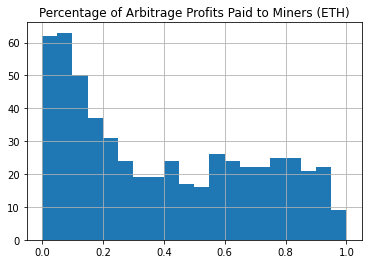

In [130]:
positive_miner_payment['miner_payment/profit'].hist(bins=20)
plt.title("Percentage of Arbitrage Profits Paid to Miners (ETH)")

In [133]:
positive_miner_payment['profit_amount_eth'] = positive_miner_payment['profit_amount'] / 10**18

<ipython-input-133-30da923f2c29>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  positive_miner_payment['profit_amount_eth'] = positive_miner_payment['profit_amount'] / 10**18


In [135]:
positive_miner_payment['miner_payment_eth'] = positive_miner_payment['coinbase_transfer'] / 10**18

<ipython-input-135-4330e665c087>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  positive_miner_payment['miner_payment_eth'] = positive_miner_payment['coinbase_transfer'] / 10**18


In [136]:
positive_miner_payment

,profit_amount,coinbase_transfer,profit-miner_payment,miner_payment/profit,profit_amount_eth,miner_payment_eth
3,7.500053e+17,7.125050e+17,3.750026e+16,0.950000,0.750005,0.712505
4,5.356071e+19,4.820464e+19,5.356071e+18,0.900000,53.560708,48.204637
6,5.209547e+17,4.688592e+17,5.209547e+16,0.900000,0.520955,0.468859
7,4.906787e+16,4.906787e+16,0.000000e+00,1.000000,0.049068,0.049068
10,9.717788e+17,9.183309e+17,5.344783e+16,0.945000,0.971779,0.918331
...,...,...,...,...,...,...
10880,2.023505e+16,4.026776e+15,1.620828e+16,0.199000,0.020235,0.004027
10891,2.372717e+16,1.176867e+16,1.195849e+16,0.496000,0.023727,0.011769
10894,5.286636e+16,2.985830e+16,2.300806e+16,0.564788,0.052866,0.029858
10899,2.629573e+16,6.416159e+15,1.987957e+16,0.244000,0.026296,0.006416


In [142]:
highest_arbitrage_pct_to_miner = positive_miner_payment.sort_values(['miner_payment/profit'], ascending=False)[['miner_payment/profit', 'profit_amount_eth', 'miner_payment_eth']][:5]
highest_arbitrage_pct_to_miner

,miner_payment/profit,profit_amount_eth,miner_payment_eth
7,1.000000,0.049068,0.049068
8257,0.983859,1.636424,1.610011
7812,0.969907,0.540054,0.523803
8169,0.966530,0.677676,0.654995
8108,0.966238,0.269022,0.259940


In [141]:
positive_miner_payment.sort_values(['profit_amount_eth'], ascending=False)[['miner_payment/profit', 'profit_amount_eth', 'miner_payment_eth']][:5]

,miner_payment/profit,profit_amount_eth,miner_payment_eth
10134,0.000064,692.367899,0.044039
5925,0.000121,91.271071,0.011037
4,0.900000,53.560708,48.204637
10542,0.047613,19.520147,0.929423
75,0.959000,18.695878,17.929347
